In [ ]:
from sklearn.svm import SVC, SVR
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [21]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

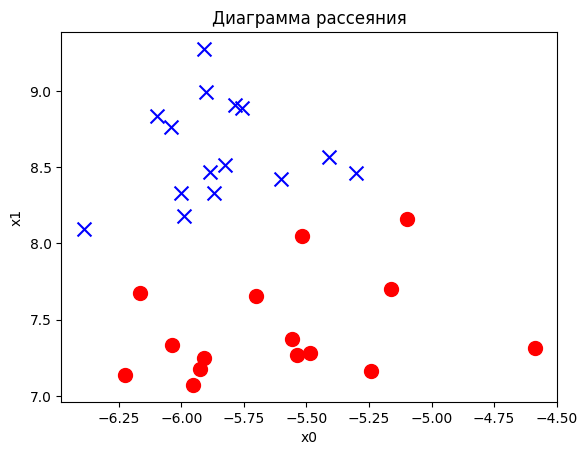

In [22]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [23]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

,C,100
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [24]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [25]:
svm_linear.intercept_

array([-64.2533988])

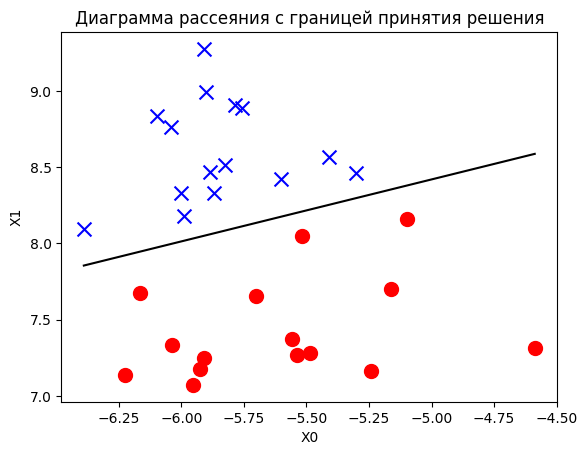

In [26]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [27]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [28]:
svm_linear.support_

array([ 0,  8, 29], dtype=int32)

In [29]:
svm_linear.n_support_

array([1, 2], dtype=int32)

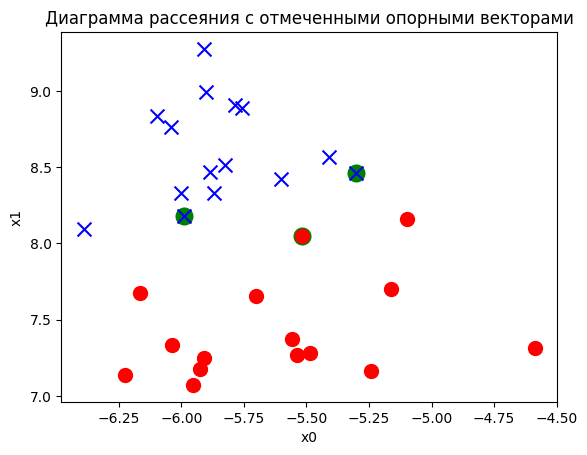

In [30]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

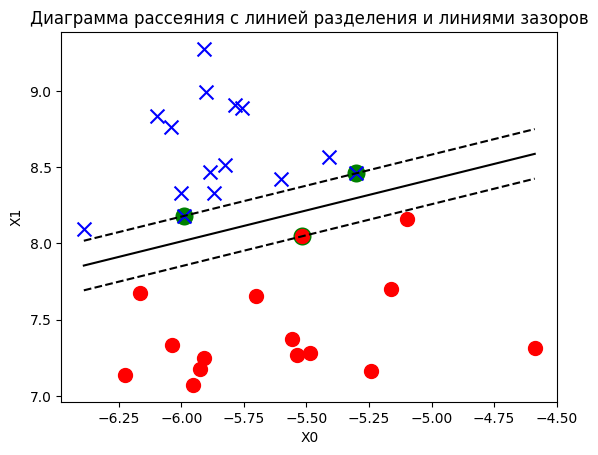

In [31]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

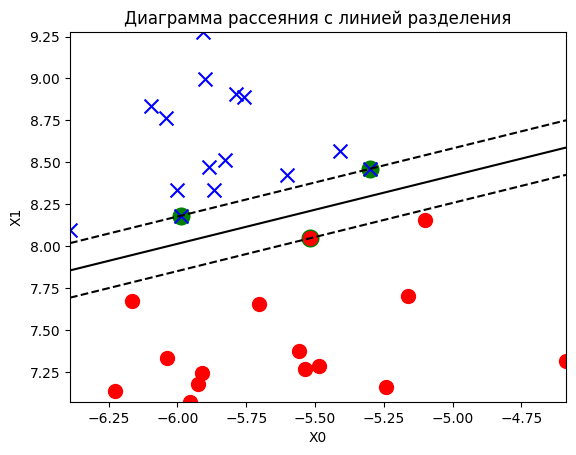

In [32]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [66]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    # plt.show()

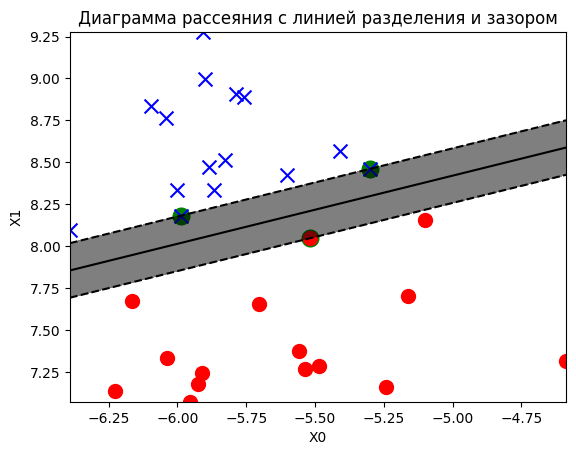

In [34]:
plot_decision_regions(X, y, svm_linear)

In [35]:
y_pred =  svm_linear.predict(X)

In [38]:
metrics.accuracy_score(y, y_pred)

1.0

In [39]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

In [40]:
observation_new = [[-5.25, 7.5]]

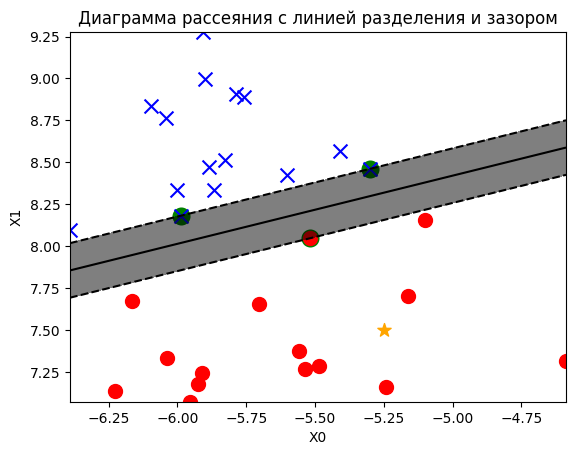

In [41]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [42]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [43]:
svm_linear.predict(observation_new)

array([0])

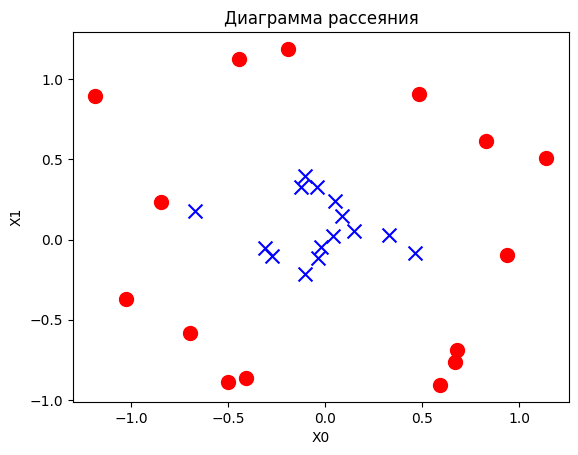

In [44]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [51]:
svm_rbf = SVC(kernel='rbf', C=1000).fit(X, y)

In [52]:
svm_rbf.n_support_
svm_rbf.support_
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

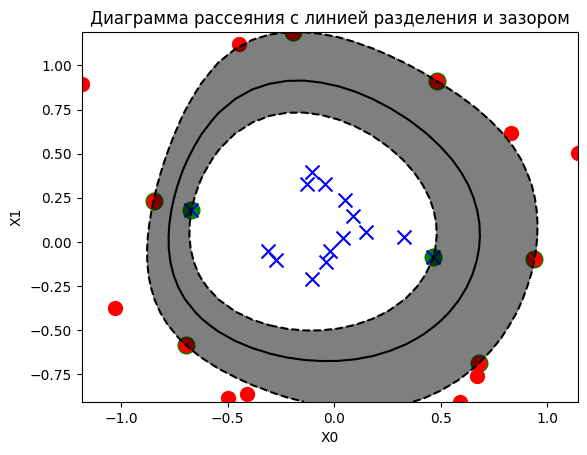

In [53]:
plot_decision_regions(X, y, svm_rbf)

In [55]:
y_pred = svm_rbf.predict(X)
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

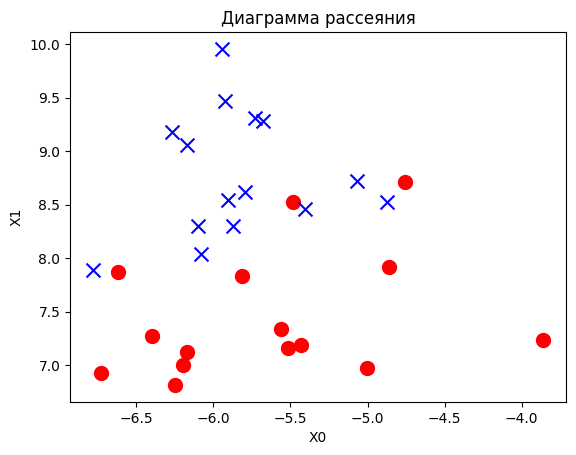

In [56]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [57]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)

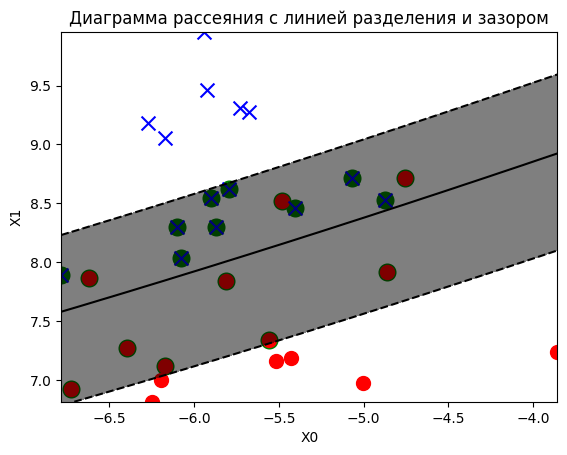

In [58]:
plot_decision_regions(X, y, svm_poly)

In [59]:
svm_poly.n_support_

array([9, 9], dtype=int32)

In [60]:
y_pred = svm_poly.predict(X)

In [61]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[12,  3],
       [ 0, 15]])

# 1

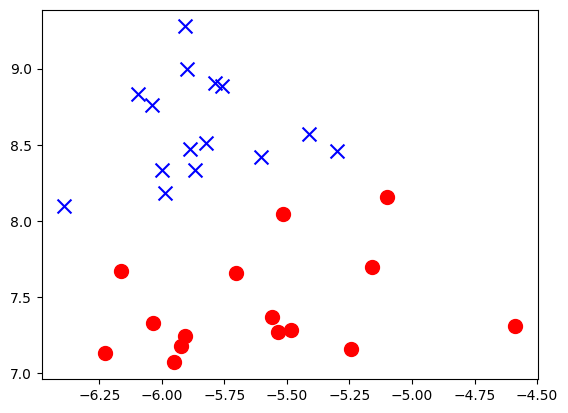

In [62]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

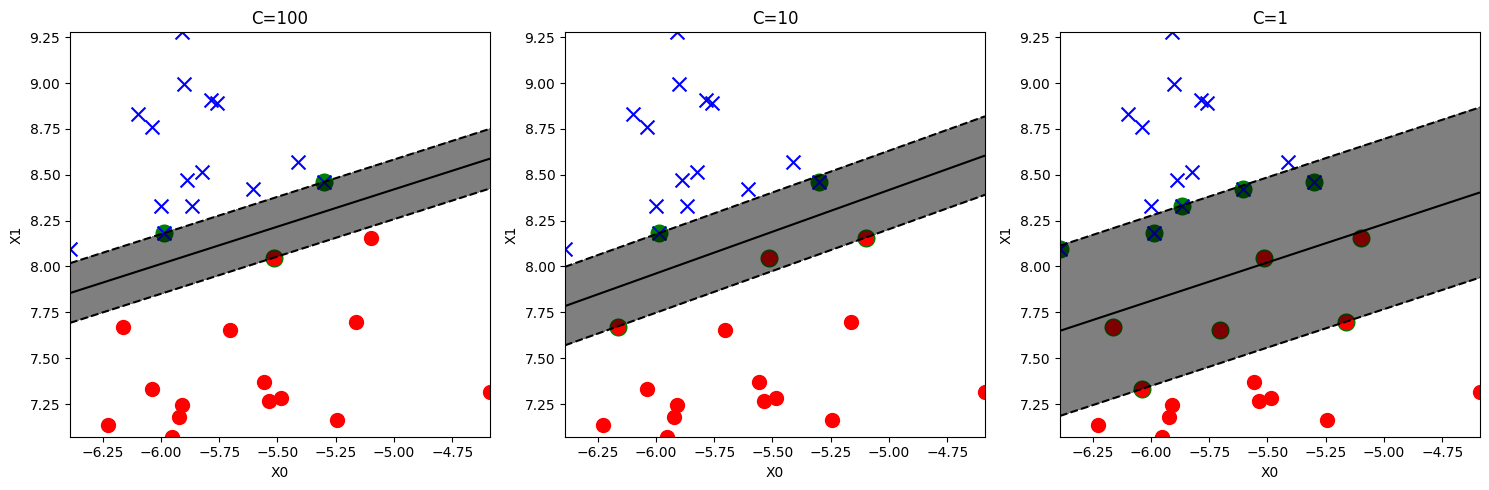

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, C in zip(axes, [100, 10, 1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    plt.sca(ax)          
    plot_decision_regions(X, y, model)
    ax.set_title(f"C={C}")

plt.tight_layout()
plt.show()

# 2

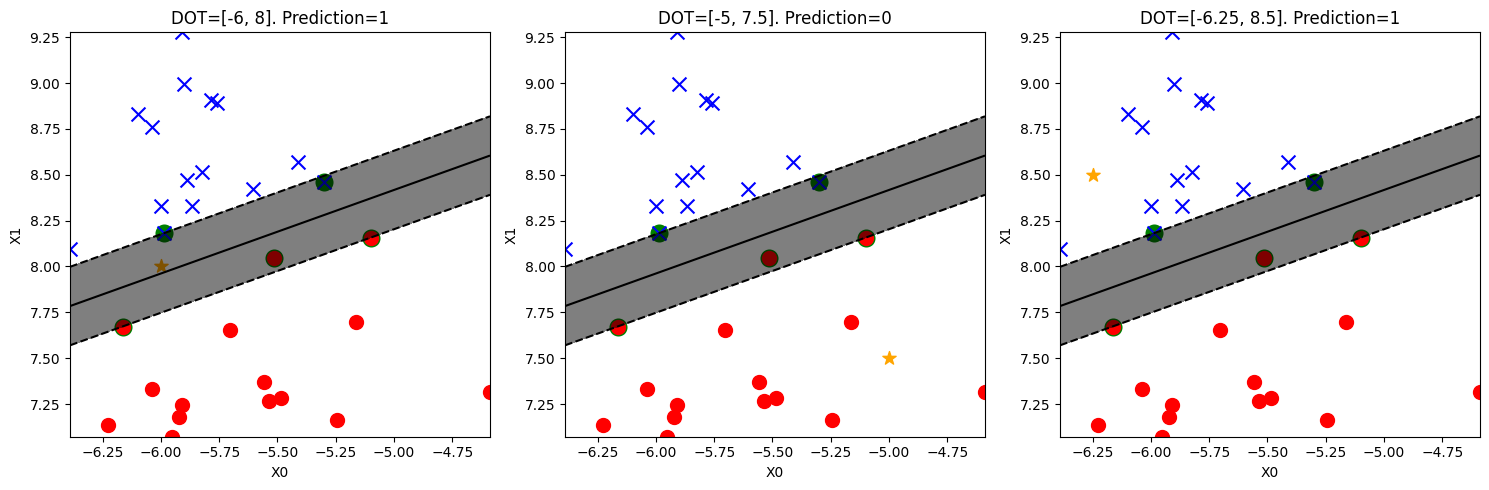

In [78]:
test_dots = [[-6, 8], [-5, 7.5], [-6.25, 8.5]]
model = SVC(kernel='linear', C=10).fit(X, y)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, dot in zip(axes, test_dots):
    plt.sca(ax)
    plt.scatter(dot[0], dot[1], marker='*', s=100, color='orange')
    plot_decision_regions(X, y, model)
    ax.set_title(f"DOT={dot}. Prediction={model.predict([dot])[0]}")
    

plt.tight_layout()
plt.show()

# 3

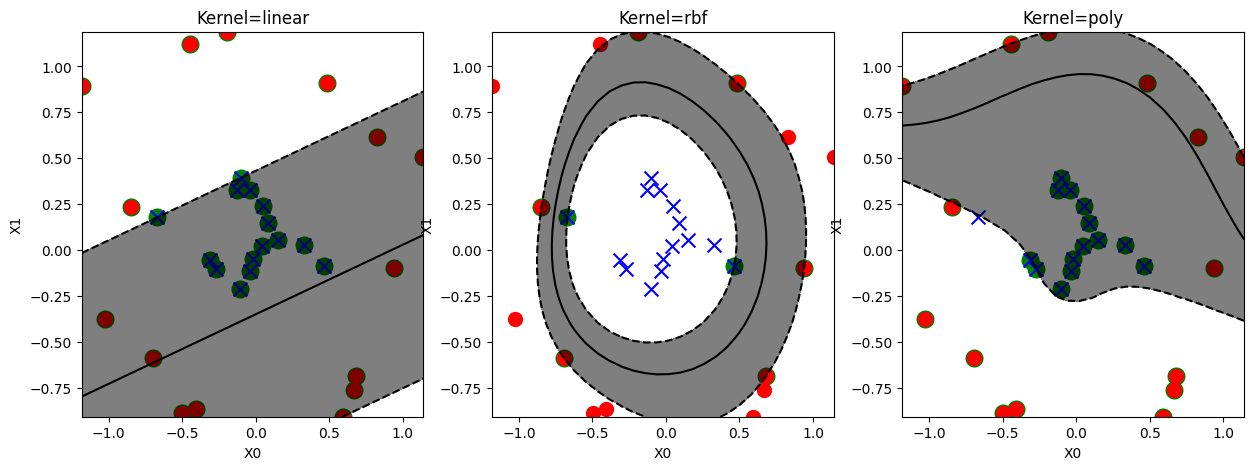

In [82]:
kernels = ['linear', 'rbf', 'poly']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

for kernel, ax in zip(kernels, axes):
    model = SVC(kernel=kernel, C=100).fit(X, y)
    plt.sca(ax)
    plot_decision_regions(X, y, model)
    ax.set_title(f"Kernel={kernel}")

# 4

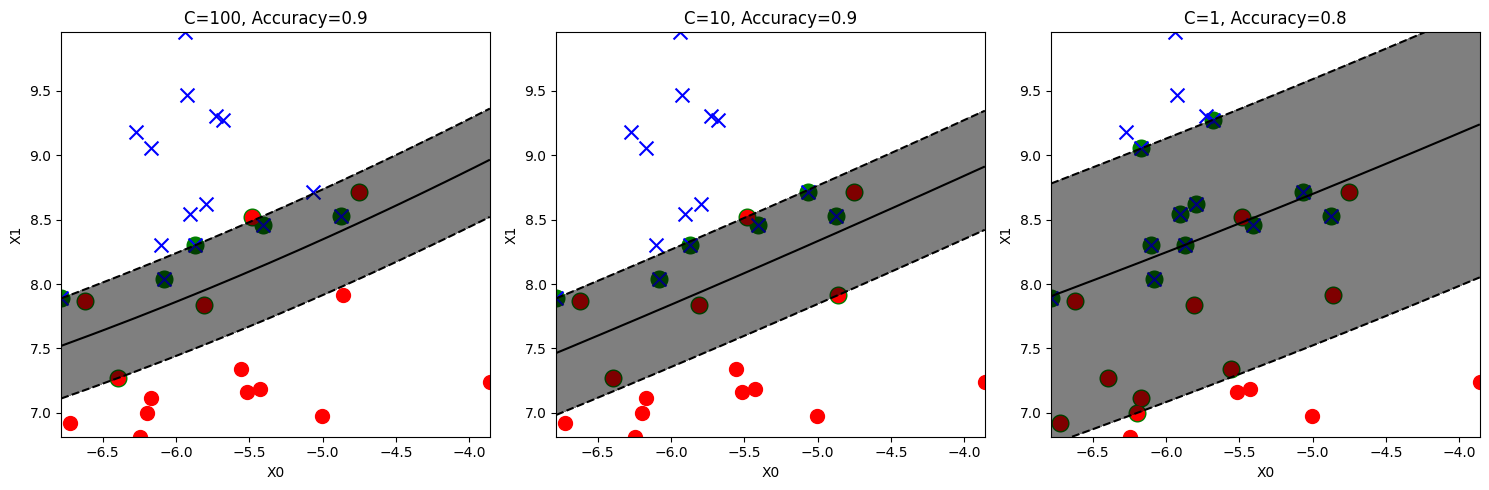

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

for ax, C in zip(axes, [100, 10, 1]):
    model = SVC(kernel='poly', degree=4, C=C).fit(X, y)
    plt.sca(ax)          
    y_pred = model.predict(X)
    plot_decision_regions(X, y, model)
    ax.set_title(f"C={C}, Accuracy={metrics.accuracy_score(y, y_pred)}")

plt.tight_layout()
plt.show()

# 5

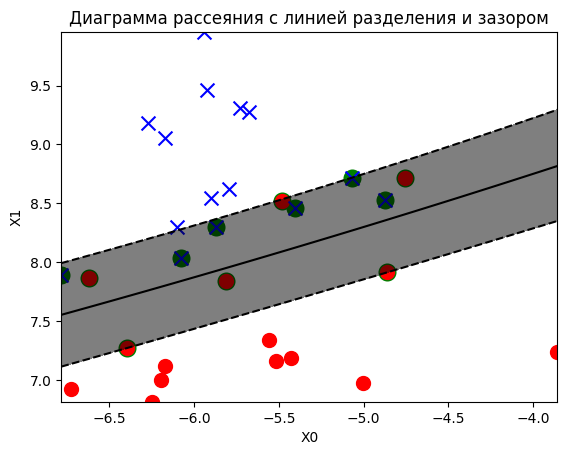

In [94]:
model = SVC(C=100).fit(X, y)
plot_decision_regions(X, y, model)


In [97]:
from sklearn.svm import LinearSVC


Text(0, 0.5, 'X1')

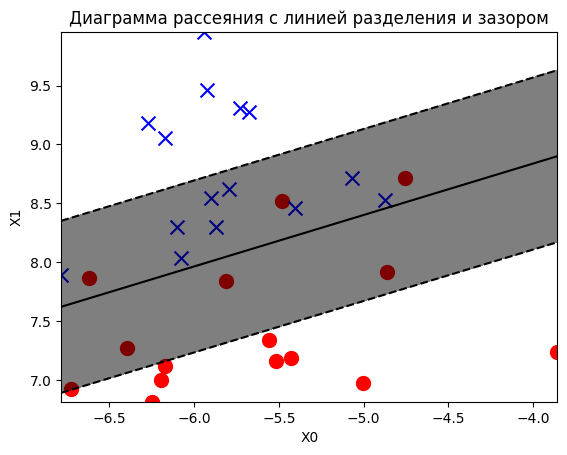

In [ ]:
model = LinearSVC(C=100)
model.fit(X, y)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

plt.title("Диаграмма рассеяния c линией разделения и зазором")
plt.xlabel('X0')
plt.ylabel('X1')



# 6

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_dist = {
    "C": uniform(0.1, 100),
    "kernel": kernels,
}

In [131]:
X, y = make_blobs(n_features=5, n_samples=1000, random_state=5, centers=2, cluster_std=.1)
kernels = ["linear", "rbf", "poly"]

In [132]:
%%time
search = RandomizedSearchCV(SVC(), random_state=42, param_distributions=param_dist, n_iter=1000, cv=5, n_jobs=-1).fit(X, y)
print(search.best_params_)
print(search.best_score_)

{'C': np.float64(37.55401188473625), 'kernel': 'linear'}
1.0
CPU times: user 1.14 s, sys: 49.8 ms, total: 1.19 s
Wall time: 3.34 s


# 7

In [140]:
X, y = make_blobs(n_features=5, n_samples=10000, random_state=5, centers=2, cluster_std=.1)


In [141]:
%%time
model = LinearSVC(C=search.best_params_['C']).fit(X, y)

CPU times: user 4.86 ms, sys: 64 μs, total: 4.92 ms
Wall time: 4.43 ms
